# Example to utilize the dataset and dataloader.

In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes

from data.build_dataset import build_dataset
from data.dataset_classes import VOC_DICT

d:\anaconda3\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
d:\anaconda3\Lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorc

# VOC dataset.

In [2]:
configs = {
    "dataset": {"path": "/home/zhuangyifan/datasets/voc", "name": "voc"},
    "train": {"crop_size": 256},
    "val": {"crop_size": -1},
}

In [4]:
dataset = build_dataset(configs, "val")

FileNotFoundError: [Errno 2] No such file or directory: '/home/zhuangyifan/datasets/voc\\VOCdevkit\\VOC2012\\ImageSets\\Main\\val.txt'

In [3]:
# Visualize the first image.
index = 1
image = dataset[index]["image"]
boxes = torch.stack([dp.data for dp in dataset[index]["boxes"]], dim=0)
labels = [list(VOC_DICT.keys())[int(label)] for label in dataset[index]["labels"]]

image_vis = (255.0 * image).to(torch.uint8)
image_vis = (
    draw_bounding_boxes(image_vis, boxes, labels, colors="red")
    .permute(1, 2, 0)
    .numpy()
)

plt.figure(figsize=(5, 5))
plt.imshow(image_vis)
plt.axis("off")
plt.show()

NameError: name 'dataset' is not defined

In [12]:
# Create the dataloader.
from data.build_dataset import collate_fn

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=1,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn,
    drop_last=True,
)
dataloader_iter = iter(dataloader)

In [13]:
images, targets = next(dataloader_iter)

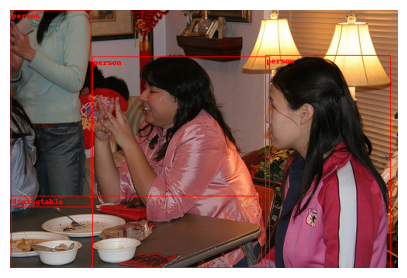

In [14]:
# Visualize the first image.
index = 0
image = images[index]
boxes = targets[index]["boxes"]
labels = [list(VOC_DICT.keys())[int(label)] for label in targets[index]["labels"]]

image_vis = (255.0 * image).to(torch.uint8)
image_vis = (
    draw_bounding_boxes(image_vis, boxes, labels, colors="red")
    .permute(1, 2, 0)
    .numpy()
)

plt.figure(figsize=(5, 5))
plt.imshow(image_vis)
plt.axis("off")
plt.show()